<a href="https://colab.research.google.com/github/Chrizzy-Slatt/E-Booking-Billiard/blob/main/SentimenAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install all library**

In [ ]:
# Cell 1: Install semua library
!pip install google-play-scraper pandas numpy scikit-learn Sastrawi nltk transformers datasets accelerate evaluate
!pip install --upgrade transformers
!pip install --upgrade datasets evaluate


google-play-scraper: untuk ambil review dari Google Play Store.

pandas: untuk manipulasi data (DataFrame).

numpy: untuk operasi numerik.

scikit-learn: untuk baseline ML, split data, TF-IDF, Logistic Regression, evaluasi.

Sastrawi: stemmer Bahasa Indonesia.

nltk: library NLP tambahan (misal stopwords).

transformers: library Hugging Face untuk model transformer seperti IndoBERT.

datasets: Hugging Face Dataset API, untuk training data.

accelerate: optimisasi training model transformer.

evaluate: evaluasi metric seperti F1-score.

**Google Play — Python (google_play_scraper)**

In [ ]:

from google_play_scraper import reviews, Sort
import pandas as pd
import time

# Nama package aplikasi myBCA di Play Store
APP_PACKAGE = "com.bca.mybca.omni.android"

all_reviews = []
cursor = None
batch = 200  # maksimum 200 review per request

for i in range(100):  # ambil sekitar 10x200 = 2000 review
    result, cursor = reviews(
        APP_PACKAGE,
        lang='id',         # Bahasa Indonesia
        country='id',      # Negara Indonesia
        sort=Sort.NEWEST,  # ✅ HARUS 'Sort.NEWEST' atau 'Sort.MOST_RELEVANT'
        count=batch,
        continuation_token=cursor
    )

    if not result:
        break

    all_reviews.extend(result)
    print(f"Fetched {len(all_reviews)} reviews so far...")
    time.sleep(1.0)  # delay agar tidak kena rate limit

# Convert ke DataFrame
df = pd.DataFrame([{
    'reviewId': r['reviewId'],
    'userName': r['userName'],
    'score': r['score'],
    'content': r['content'],
    'at': r['at'],
    'thumbsUpCount': r.get('thumbsUpCount', 0),
    'replyText': r.get('replyText')
} for r in all_reviews])

# Simpan ke file
df.to_csv("mybca_play_reviews.csv", index=False)
print(f"✅ Saved {len(df)} reviews to mybca_play_reviews.csv")



Fetched 200 reviews so far...
Fetched 400 reviews so far...
Fetched 600 reviews so far...
Fetched 800 reviews so far...
Fetched 1000 reviews so far...
Fetched 1200 reviews so far...
Fetched 1400 reviews so far...
Fetched 1600 reviews so far...
Fetched 1800 reviews so far...
Fetched 2000 reviews so far...
Fetched 2200 reviews so far...
Fetched 2400 reviews so far...
Fetched 2600 reviews so far...
Fetched 2800 reviews so far...
Fetched 3000 reviews so far...
Fetched 3200 reviews so far...
Fetched 3400 reviews so far...
Fetched 3600 reviews so far...
Fetched 3800 reviews so far...
Fetched 4000 reviews so far...
Fetched 4200 reviews so far...
Fetched 4400 reviews so far...
Fetched 4600 reviews so far...
Fetched 4800 reviews so far...
Fetched 5000 reviews so far...
Fetched 5200 reviews so far...
Fetched 5400 reviews so far...
Fetched 5600 reviews so far...
Fetched 5800 reviews so far...
Fetched 6000 reviews so far...
Fetched 6200 reviews so far...
Fetched 6400 reviews so far...
Fetched 6600

**Penjelasan**

reviews(...): ambil review dari Google Play.

Sort.NEWEST: ambil review terbaru. Bisa juga Sort.MOST_RELEVANT.

continuation_token: pagination, supaya bisa ambil review banyak.

time.sleep(1.0): biar tidak kena rate limit server Play Store.

Data disimpan ke pandas.DataFrame dan CSV (mybca_play_reviews.csv).

In [ ]:
print(df.head())

                               reviewId     userName  score  \
0  dd106e3e-4cc7-400a-9f24-ec7a332250af     via Okta      1   
1  77ed4bc1-a7ce-456a-8a5c-27c8b8503fa5  Imam Syafii      5   
2  2b58d9ea-286a-46a0-b1c2-0296114d470a       A23 NS      1   
3  a3648db9-2c2c-4c0d-a173-b369622a5586   Rifqi Game      1   
4  bdb8d209-768b-4f55-875b-c495bc7009aa    Sugeng ID      1   

                                             content                  at  \
0  mau login susah banget meskipun sinyal bagus,,... 2025-11-02 03:05:07   
1                                              bagus 2025-11-02 01:32:11   
2  Tolong di update dong, Ngebug aplikasinya. Not... 2025-11-01 23:35:03   
3            minta otp susah banget sampe pulsa abis 2025-11-01 17:00:14   
4     mau masuk saja susah, enakan mobil banking BCA 2025-11-01 16:15:12   

   thumbsUpCount replyText  
0              0      None  
1              0      None  
2              0      None  
3              0      None  
4              0   

In [ ]:
from IPython.display import display
display(df)


,reviewId,userName,score,content,at,thumbsUpCount,replyText
0,dd106e3e-4cc7-400a-9f24-ec7a332250af,via Okta,1,"mau login susah banget meskipun sinyal bagus,,...",2025-11-02 03:05:07,0,None
1,77ed4bc1-a7ce-456a-8a5c-27c8b8503fa5,Imam Syafii,5,bagus,2025-11-02 01:32:11,0,None
2,2b58d9ea-286a-46a0-b1c2-0296114d470a,A23 NS,1,"Tolong di update dong, Ngebug aplikasinya. Not...",2025-11-01 23:35:03,0,None
3,a3648db9-2c2c-4c0d-a173-b369622a5586,Rifqi Game,1,minta otp susah banget sampe pulsa abis,2025-11-01 17:00:14,0,None
4,bdb8d209-768b-4f55-875b-c495bc7009aa,Sugeng ID,1,"mau masuk saja susah, enakan mobil banking BCA",2025-11-01 16:15:12,0,None
...,...,...,...,...,...,...,...
19995,166e77e0-7131-47a8-b9c2-4d797e71721e,doris dudul,1,"KALAU TIAP LOG IN HARUS PAKAI PULSA MAH , SAMA...",2024-02-12 17:45:30,0,None
19996,7af21bb5-a749-4e96-992c-22041660e7e9,Khoirul Sahri,1,Ini myBca knpa dah?? Kemaren gw baru aja login...,2024-02-12 16:49:07,1,None
19997,edb9f7b1-0641-445e-a4ea-c535634c302e,tt titok,1,kode otpnya gak nyampe² hadeehhh,2024-02-12 15:37:47,0,None
19998,1b98af38-92af-4b7b-98a4-12a116b9e7a0,Fajar T,1,Ribet login nya/lupa password nya,2024-02-12 15:22:23,0,None


**App Store**

In [ ]:
import pandas as pd
from datetime import datetime
import requests


APP_ID = "1440241902"
COUNTRY = "id"  # id = Indonesia store
BASE = f"https://itunes.apple.com/{COUNTRY}/rss/customerreviews/id={APP_ID}/json"

resp = requests.get(BASE, timeout=15)
resp.raise_for_status()
data = resp.json()

entries = data.get('feed', {}).get('entry', [])
# first entry is app metadata; reviews follow
reviews = []
for e in entries:
    # skip first entry if it's metadata
    if 'author' not in e:
        continue
    reviews.append({
        'id': e.get('id', {}).get('label'),
        'userName': e.get('author', {}).get('name', {}).get('label'),
        'score': int(e.get('im:rating', {}).get('label', 0)),
        'title': e.get('title', {}).get('label'),
        'content': e.get('content', {}).get('label'),
        'version': e.get('im:version', {}).get('label'),
        'updated': e.get('updated', {}).get('label')
    })

df = pd.DataFrame(reviews)
df.to_csv("mybca_appstore_reviews.csv", index=False)
print("saved mybca_appstore_reviews.csv")


saved mybca_appstore_reviews.csv


**Pre Processing**

In [ ]:

import re
import pandas as pd
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.model_selection import train_test_split

df = pd.read_csv("mybca_play_reviews.csv")  # contoh
df['source'] = 'play'

# basic cleaning
def clean_text(s):
    if pd.isna(s): return ""
    s = str(s).lower()
    s = re.sub(r'http\S+', '', s)             # remove urls
    s = re.sub(r'\n', ' ', s)
    s = re.sub(r'[@#]\S+', '', s)
    s = re.sub(r'[^0-9a-záàâäãåéèêëíìîïóòôöõúùûüçñ\s]', ' ', s)  # keep letters/numbers
    s = re.sub(r'\s+', ' ', s).strip()
    return s

df['content_clean'] = df['content'].apply(clean_text)

# Indonesian stemming
factory = StemmerFactory()
stemmer = factory.create_stemmer()
df['content_stem'] = df['content_clean'].apply(lambda x: stemmer.stem(x))

# label from score
def score_to_label(s):
    if s <= 2: return 'negative'
    if s == 3: return 'neutral'
    return 'positive'

df['sentiment'] = df['score'].apply(score_to_label)

train, test = train_test_split(df, test_size=0.2, stratify=df['sentiment'], random_state=42)
print(f"Train size: {len(train)}, Test size: {len(test)}")


Train size: 16000, Test size: 4000


clean_text: membersihkan teks → lowercase, hapus URL, simbol, karakter non-alfabet.

Sastrawi Stemmer: memotong kata menjadi akar kata (contoh: “memperbaiki” → “baik”).

score_to_label: convert rating numeric (1–5) menjadi label sentiment (negative, neutral, positive).

train_test_split: pisah data untuk train/test (stratify supaya distribusi sentiment seimbang).

In [ ]:
display(df)

,reviewId,userName,score,content,at,thumbsUpCount,replyText,source,content_clean,content_stem,sentiment
0,dd106e3e-4cc7-400a-9f24-ec7a332250af,via Okta,1,"mau login susah banget meskipun sinyal bagus,,...",2025-11-02 03:05:07,0,NaN,play,mau login susah banget meskipun sinyal bagus a...,mau login susah banget meski sinyal bagus apk ...,negative
1,77ed4bc1-a7ce-456a-8a5c-27c8b8503fa5,Imam Syafii,5,bagus,2025-11-02 01:32:11,0,NaN,play,bagus,bagus,positive
2,2b58d9ea-286a-46a0-b1c2-0296114d470a,A23 NS,1,"Tolong di update dong, Ngebug aplikasinya. Not...",2025-11-01 23:35:03,0,NaN,play,tolong di update dong ngebug aplikasinya notif...,tolong di update dong ngebug aplikasi notifika...,negative
3,a3648db9-2c2c-4c0d-a173-b369622a5586,Rifqi Game,1,minta otp susah banget sampe pulsa abis,2025-11-01 17:00:14,0,NaN,play,minta otp susah banget sampe pulsa abis,minta otp susah banget sampe pulsa abis,negative
4,bdb8d209-768b-4f55-875b-c495bc7009aa,Sugeng ID,1,"mau masuk saja susah, enakan mobil banking BCA",2025-11-01 16:15:12,0,NaN,play,mau masuk saja susah enakan mobil banking bca,mau masuk saja susah enak mobil banking bca,negative
...,...,...,...,...,...,...,...,...,...,...,...
19995,166e77e0-7131-47a8-b9c2-4d797e71721e,doris dudul,1,"KALAU TIAP LOG IN HARUS PAKAI PULSA MAH , SAMA...",2024-02-12 17:45:30,0,NaN,play,kalau tiap log in harus pakai pulsa mah sama a...,kalau tiap log in harus pakai pulsa mah sama a...,negative
19996,7af21bb5-a749-4e96-992c-22041660e7e9,Khoirul Sahri,1,Ini myBca knpa dah?? Kemaren gw baru aja login...,2024-02-12 16:49:07,1,NaN,play,ini mybca knpa dah kemaren gw baru aja login t...,ini mybca knpa dah kemaren gw baru aja login t...,negative
19997,edb9f7b1-0641-445e-a4ea-c535634c302e,tt titok,1,kode otpnya gak nyampe² hadeehhh,2024-02-12 15:37:47,0,NaN,play,kode otpnya gak nyampe hadeehhh,kode otpnya gak nyampe hadeehhh,negative
19998,1b98af38-92af-4b7b-98a4-12a116b9e7a0,Fajar T,1,Ribet login nya/lupa password nya,2024-02-12 15:22:23,0,NaN,play,ribet login nya lupa password nya,ribet login nya lupa password nya,negative


**Baseline Model
TF-IDF + Logistic Regression**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix

# Data
X_train = train['content_stem'].values
y_train = train['sentiment'].values
X_test = test['content_stem'].values
y_test = test['sentiment'].values

# Pipeline TF-IDF + Logistic Regression
# vect = TfidfVectorizer(ngram_range=(1,2), max_features=20000)
# clf = LogisticRegression(class_weight='balanced', max_iter=1000)
vect = TfidfVectorizer(
    ngram_range=(1,2),
    max_features=30000,   # 🔼 increase since you have 20k data
    min_df=2,             # ignore words that appear only once
    max_df=0.9            # ignore words that appear in 90%+ of texts
)
clf = LogisticRegression(
    class_weight='balanced',
    max_iter=2000,        # more iterations for convergence
    C=2.0,                # slightly stronger regularization
    solver='lbfgs'
)
pipe = make_pipeline(vect, clf)

# Train
pipe.fit(X_train, y_train)

# Predict
y_pred = pipe.predict(X_test)

# Evaluasi
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

    negative       0.79      0.80      0.80      1768
     neutral       0.19      0.29      0.23       313
    positive       0.92      0.83      0.87      1919

    accuracy                           0.78      4000
   macro avg       0.64      0.64      0.63      4000
weighted avg       0.81      0.78      0.79      4000

Confusion Matrix:
[[1418  256   94]
 [ 182   92   39]
 [ 189  136 1594]]


TF-IDF: ubah teks menjadi representasi numerik berdasarkan frekuensi kata.

Logistic Regression: model klasifikasi sederhana tapi efektif untuk text sentiment.

Pipeline: menggabungkan TF-IDF + Logistic Regression agar langsung fit & predict.

Evaluasi: classification_report (precision, recall, f1-score), confusion_matrix.

**Advanced: Fine-tune IndoBERT**

In [ ]:
# Install semua library yang dibutuhkan
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
import numpy as np
import evaluate

MODEL = "indobenchmark/indobert-base-p1"  # atau 'xlm-roberta-base'
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL, num_labels=3)

# Convert pandas -> Hugging Face Dataset
ds_train = Dataset.from_pandas(train[['content_stem','sentiment']].rename(columns={'content_stem':'text','sentiment':'label'}))
ds_test = Dataset.from_pandas(test[['content_stem','sentiment']].rename(columns={'content_stem':'text','sentiment':'label'}))

# Mapping label ke angka
label2id = {'negative':0,'neutral':1,'positive':2}
ds_train = ds_train.map(lambda x: {'label': label2id[x['label']]})
ds_test = ds_test.map(lambda x: {'label': label2id[x['label']]})

# Tokenisasi
ds_train = ds_train.map(lambda x: tokenizer(x['text'], truncation=True, padding='max_length', max_length=128), batched=True)
ds_test = ds_test.map(lambda x: tokenizer(x['text'], truncation=True, padding='max_length', max_length=128), batched=True)

# Training Arguments
# training_args = TrainingArguments(
#     output_dir="out",
#     report_to="none",
#     eval_strategy="epoch",
#     per_device_train_batch_size=16,
#     per_device_eval_batch_size=32,
#     num_train_epochs=3,
#     weight_decay=0.01
# )
training_args = TrainingArguments(
    output_dir="out",
    report_to="none",
    eval_strategy="epoch",
    per_device_train_batch_size=8,  # 🔽 smaller batch to fit memory
    per_device_eval_batch_size=16,
    num_train_epochs=4,             # 🔼 try 4–5 epochs with early stop
    weight_decay=0.01,
    learning_rate=2e-5,             # 🔑 fine-tuning LR
    warmup_ratio=0.1,               # optional: warm-up learning rate
    logging_steps=100,
    save_strategy="epoch"
)

metric = evaluate.load("f1")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)
    return evaluate.load("f1").compute(predictions=preds, references=labels, average='macro')

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=ds_train,
    eval_dataset=ds_test,
    compute_metrics=compute_metrics
)

# Train
trainer.train()

# Simpan model
trainer.save_model("indoBERT_myBCA")
print("✅ Model IndoBERT saved!")

# Evaluate on the test set
results = trainer.evaluate(ds_test)
print("Evaluation results:", results)

# Get predictions
preds_output = trainer.predict(ds_test)
y_true = preds_output.label_ids
y_pred = np.argmax(preds_output.predictions, axis=-1)

# Accuracy
acc = accuracy_score(y_true, y_pred)
print("Accuracy:", acc)

# Detailed classification report
print(classification_report(y_true, y_pred, target_names=['negative','neutral','positive']))



Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/4000 [00:00<?, ? examples/s]

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/4000 [00:00<?, ? examples/s]

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch,Training Loss,Validation Loss


KeyboardInterrupt: 

Tokenizer + Dataset: konversi teks menjadi token yang dimengerti model BERT.

Mapping Label: convert negative/neutral/positive → 0,1,2.

TrainingArguments: set batch size, epoch, eval strategy, weight decay.

Trainer: class Hugging Face untuk training & evaluation otomatis.

compute_metrics: pakai macro F1 untuk multi-class.

trainer.train(): fine-tune model pada dataset kamu.

trainer.save_model(...): simpan model di folder indoBERT_myBCA (di Colab, ini di virtual machine). Bisa di-download nanti.

Perbedaan dengan TF-IDF:

TF-IDF + Logistic Regression: cepat, simple, explainable, tapi kurang paham konteks.

IndoBERT: deep learning, paham konteks kata & kalimat, hasil lebih akurat tapi butuh GPU & lebih lambat.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Baca CSV yang sudah diambil
df = pd.read_csv("mybca_play_reviews.csv")

# Filter review netral (score = 3)
df = df[df['score'] != 3]

# Label untuk sentiment (1 = positif, 0 = negatif)
df['sentiment'] = df['score'].apply(lambda x: 1 if x > 3 else 0)

# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(
    df['content'], df['sentiment'], test_size=0.2, random_state=42
)

# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Buat model SVM
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train_tfidf, y_train)

# Prediksi dan evaluasi
y_pred = svm_model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Optional: simpan DataFrame dengan label sentiment
df.to_csv("mybca_play_reviews_svm.csv", index=False)
print(f"✅ Saved {len(df)} reviews with sentiment labels to CSV")


Accuracy: 0.8899132321041214

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89      1797
           1       0.92      0.86      0.89      1891

    accuracy                           0.89      3688
   macro avg       0.89      0.89      0.89      3688
weighted avg       0.89      0.89      0.89      3688

✅ Saved 18437 reviews with sentiment labels to CSV


Membaca data ulasan dari file CSV.

Menghapus ulasan netral (skor = 3).

Memberi label sentimen: skor 4–5 sebagai positif (1), dan skor 1–2 sebagai negatif (0).

Membagi data menjadi data latih (80%) dan data uji (20%).

Mengubah teks ulasan menjadi bentuk numerik menggunakan TF-IDF.

Melatih model SVM kernel linear dengan data latih.

Menguji model pada data uji dan menampilkan akurasi serta laporan klasifikasi.

Menyimpan hasil data dengan label sentimen ke file baru CSV.


TfidfVectorizer mengubah teks menjadi matriks fitur numerik:

menghitung TF-IDF tiap token (kata/ngram).

max_features=5000 membatasi jumlah fitur (kata) paling penting sampai 5000.

fit_transform di train: mempelajari vocabulary + transform.

transform di test: memakai vocabulary yang sama.

Saran preprocessing sebelum TF-IDF:

lowercase, remove punctuation, optional tokenisasi atau stemming/lemmatization (terutama untuk bahasa selain Inggris).

atur stop_words, pertimbangkan ngram_range=(1,2) untuk capture frasa.

contoh:

TfidfVectorizer(max_features=5000, ngram_range=(1,2), min_df=5)


kernel='linear' umum untuk teks (linear SVM cepat dan baik).

C mengatur regularisasi: nilai kecil → regularisasi kuat; besar → overfit risk.

SVM tidak memberikan probabilitas kecuali probability=True (walau lebih lambat).

Peningkatan:

pakai class_weight='balanced' jika label imbalance.

lakukan GridSearchCV untuk tuning C dan kernel.

alternatif cepat: LinearSVC (lebih cepat untuk dataset besar).

/tmp/ipython-input-903067388.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette="Set2")


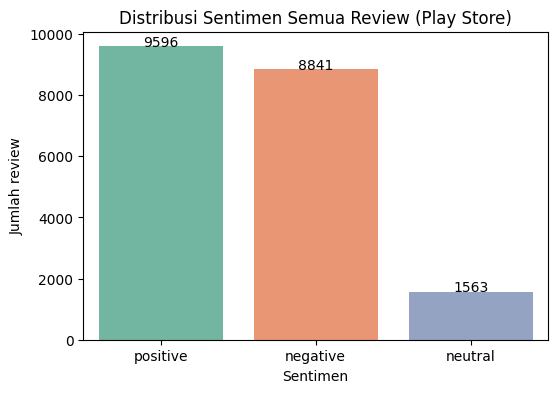

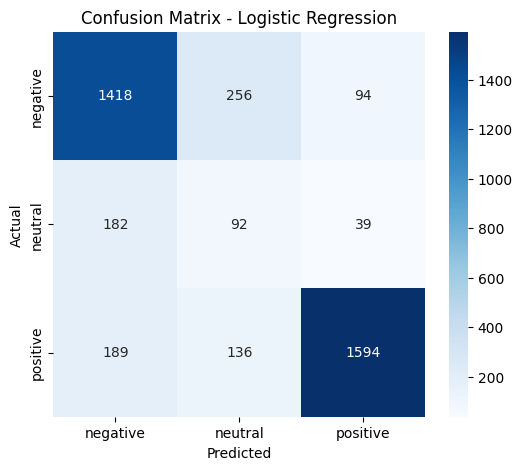

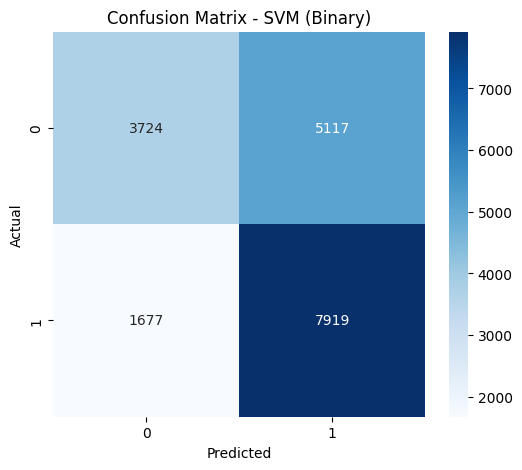

In [ ]:
# ==============================
# Cell X: Visualisasi Sentimen
# ==============================
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix

# --- 1) Bar chart distribusi sentiment ---
def plot_sentiment_distribution(df, title="Distribusi Sentimen"):
    if 'sentiment' not in df.columns:
        # buat kolom sentiment dari score kalau belum ada
        def score_to_label(s):
            if s <= 2: return 'negative'
            if s == 3: return 'neutral'
            return 'positive'
        df['sentiment'] = df['score'].apply(score_to_label)

    counts = df['sentiment'].value_counts()
    plt.figure(figsize=(6,4))
    sns.barplot(x=counts.index, y=counts.values, palette="Set2")
    plt.title(title)
    plt.ylabel("Jumlah review")
    plt.xlabel("Sentimen")
    for i, v in enumerate(counts.values):
        plt.text(i, v + 10, str(v), ha='center')
    plt.show()

# Jalankan untuk semua review Play Store
plot_sentiment_distribution(pd.read_csv("mybca_play_reviews.csv"), title="Distribusi Sentimen Semua Review (Play Store)")

# --- 2) Confusion matrix visualisasi ---
def plot_confusion(y_true, y_pred, labels=['negative','neutral','positive'], title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred, labels=range(len(labels)))
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

# Contoh untuk Logistic Regression / IndoBERT
# Pastikan y_true dan y_pred sudah berupa label angka
label2id = {'negative':0,'neutral':1,'positive':2}

# Logistic Regression
y_true_lr = [label2id[s] for s in test['sentiment']]
y_pred_lr = pipe.predict(test['content_stem'])
y_pred_lr_num = [label2id[s] if isinstance(s,str) else s for s in y_pred_lr]
plot_confusion(y_true_lr, y_pred_lr_num, title="Confusion Matrix - Logistic Regression")

# SVM (2 kelas: 0=negatif,1=positif)
df_svm = pd.read_csv("mybca_play_reviews_svm.csv")
y_true_svm = df_svm['sentiment']
y_pred_svm = svm_model.predict(TfidfVectorizer(max_features=5000).fit_transform(df_svm['content']))
plot_confusion(y_true_svm, y_pred_svm, labels=[0,1], title="Confusion Matrix - SVM (Binary)")

# # IndoBERT
# y_true_bert = y_true
# y_pred_bert = y_pred
# plot_confusion(y_true_bert, y_pred_bert, title="Confusion Matrix - IndoBERT")


1. Baris “Actual Negative”

Benar Negatif (TN) = 1418 → model dengan benar memprediksi data negatif.

Salah ke Neutral = 256 → data negatif dikira neutral.

Salah ke Positif = 94 → data negatif dikira positif.

Model cukup baik mengenali kelas negative, tapi masih sering tertukar dengan neutral.

2. Baris “Actual Neutral”

Benar Neutral = 92 → model benar hanya 92 kali.

Salah ke Negative = 182 → banyak data neutral dikira negative.

Salah ke Positive = 39 → sebagian kecil dikira positive.

Ini kelas yang paling sulit dibedakan — model kesulitan mengenali neutral dan lebih sering menganggapnya negative.

3. Baris “Actual Positive”

Benar Positive = 1594 → model sangat baik mengenali positive.

Salah ke Neutral = 136 → sedikit bingung dengan neutral.

Salah ke Negative = 189 → sebagian kecil dikira negative.

Kinerja untuk kelas positive paling baik.

Kesimpulan untuk Masing-Masing Model
Logistic Regression (berdasarkan gambar)

Kelas positif: sangat baik → 1594 benar dari total 1919.

Kelas negatif: juga cukup baik → 1418 benar dari total 1768.

Kelas netral: paling buruk → hanya 92 benar dari 313 (≈ 29%).

Masalah utama: model kesulitan membedakan neutral, sering salah ke negative atau positive.

Jika gambar kedua adalah milik SVM (misalnya hasilnya serupa)

Biasanya SVM punya ciri:

Lebih tegas dalam memisahkan kelas (margin-based classifier).

Jika hasilnya hampir sama, mungkin sedikit lebih baik dalam kelas neutral atau negative, tergantung parameter kernel-nya.

Namun Logistic Regression sering lebih stabil dan cepat dilatih.

Perbandingan bisa dibuat dengan metrik seperti:

Accuracy = (1418 + 92 + 1594) / total

Precision/Recall per kelas → untuk tahu di mana model paling kuat/lemah.